In [10]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
drive_path = '/content/drive/MyDrive/Colab Notebooks/medical_insurance.csv'
df = pd.read_csv(drive_path)
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

'''data cleaning'''

In [13]:
print("missing values before cleaning")
print(df.isnull().sum()[df.isnull().sum() > 0])

df['income'].fillna(df['income'].mean(), inplace=True)
df['provider_quality'].fillna(df['provider_quality'].mean(), inplace=True)
df['risk_score'].fillna(df['risk_score'].mean(), inplace=True)

print("\nmissing values after cleaning")
print(df.isnull().sum()[df.isnull().sum() > 0])

missing values before cleaning
alcohol_freq    30083
dtype: int64

missing values after cleaning
alcohol_freq    30083
dtype: int64


/tmp/ipython-input-1711110668.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(df['income'].mean(), inplace=True)
/tmp/ipython-input-1711110668.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

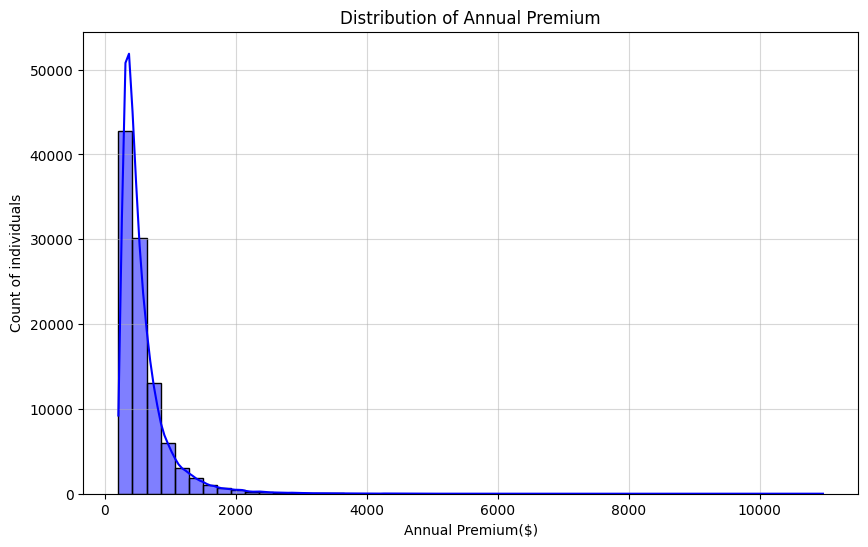

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_premium'], bins=50, kde=True, color='blue')
plt.title('Distribution of Annual Premium')
plt.xlabel('Annual Premium($)')
plt.ylabel('Count of individuals')

plt.grid(True, alpha=0.5)
plt.show()

/tmp/ipython-input-3413766931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette='viridis')


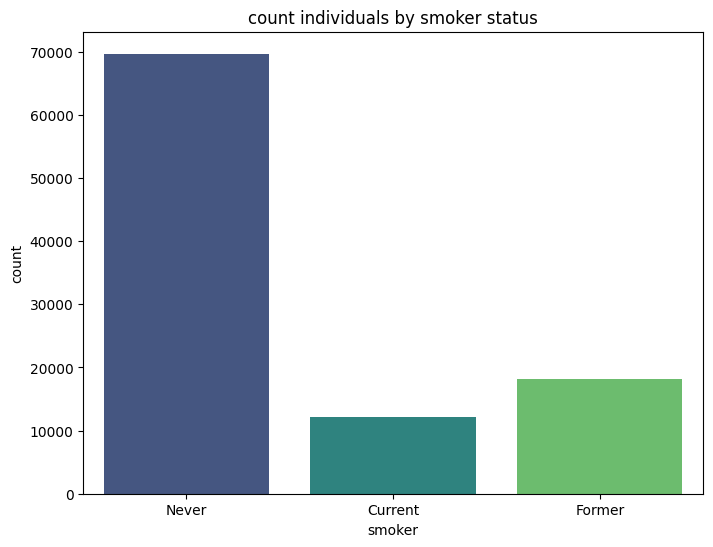

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=df, palette='viridis')
plt.title('count individuals by smoker status')
plt.xlabel('smoker')
plt.ylabel('count')
plt.show()

/tmp/ipython-input-2173941683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='annual_premium', data=df, palette='coolwarm')


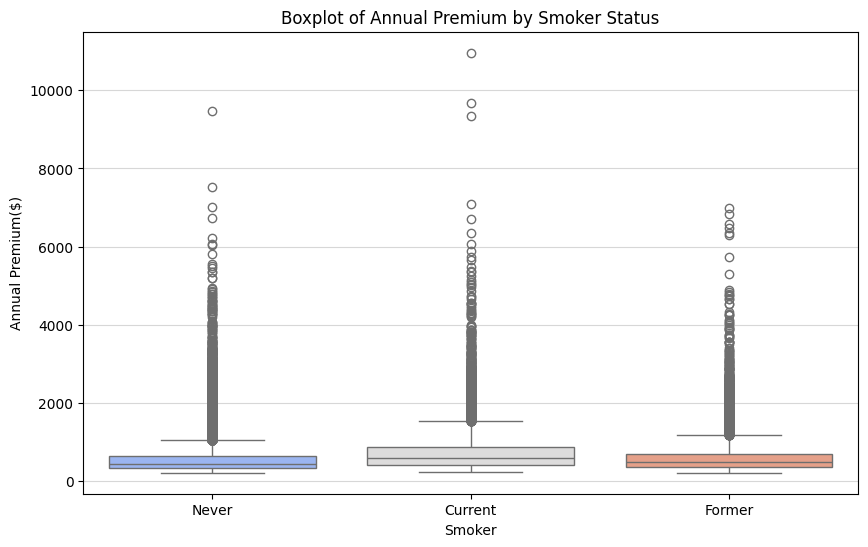

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='annual_premium', data=df, palette='coolwarm')
plt.title('Boxplot of Annual Premium by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Annual Premium($)')
plt.grid(axis='y', alpha=0.5)
plt.show()

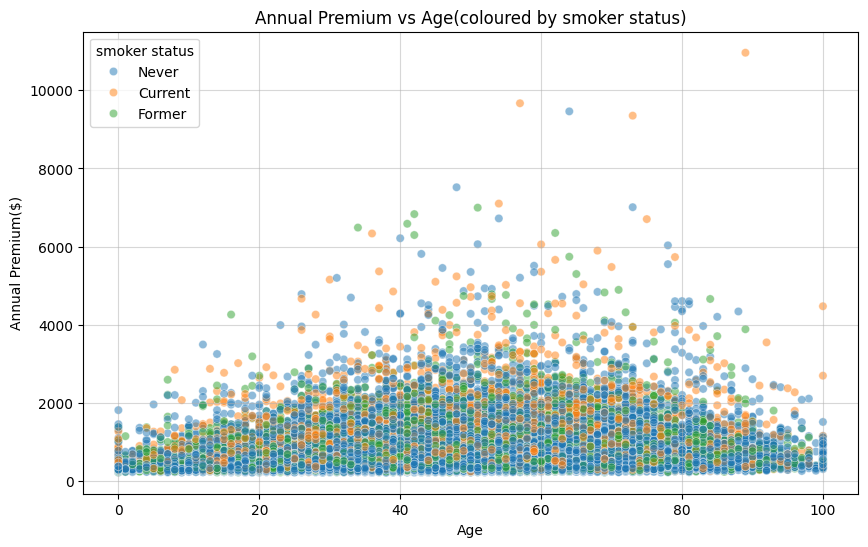

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='annual_premium', data=df, alpha=0.5, hue='smoker')
plt.title('Annual Premium vs Age(coloured by smoker status)')
plt.xlabel('Age')
plt.ylabel('Annual Premium($)')
plt.legend(title='smoker status')
plt.grid(True, alpha=0.5)
plt.show()

/tmp/ipython-input-2969670182.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bmi_category', data=df , palette='pastel')


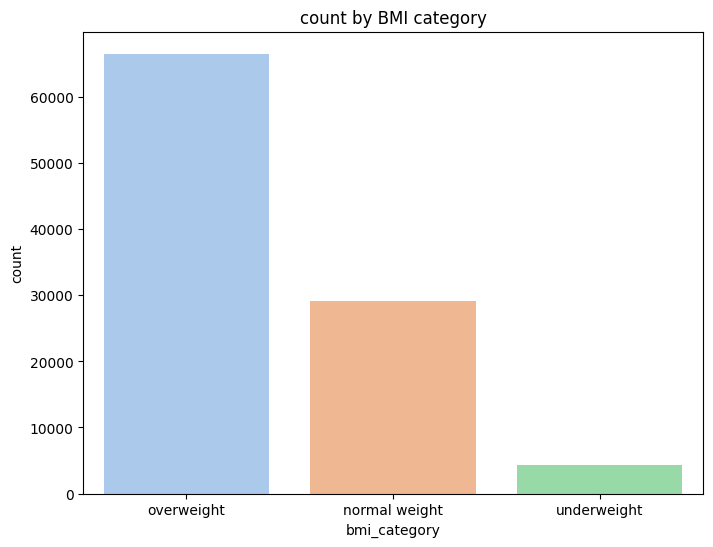

In [32]:
def bmi_category(bmi):
  if bmi < 18.5:
    return'underweight'
  elif 18.5 <= bmi < 24.9:
    return 'normal weight'
  else:
    return 'overweight'

df['bmi_category'] = df['bmi'].apply(bmi_category)

plt.figure(figsize=(8, 6))
sns.countplot(x='bmi_category', data=df , palette='pastel')
plt.title('count by BMI category')
plt.show()

correlation matrix
annual_premium         1.000000
monthly_premium        1.000000
annual_medical_cost    0.965415
total_claims_paid      0.713764
avg_claim_amount       0.608786
risk_score             0.295859
Name: annual_premium, dtype: float64


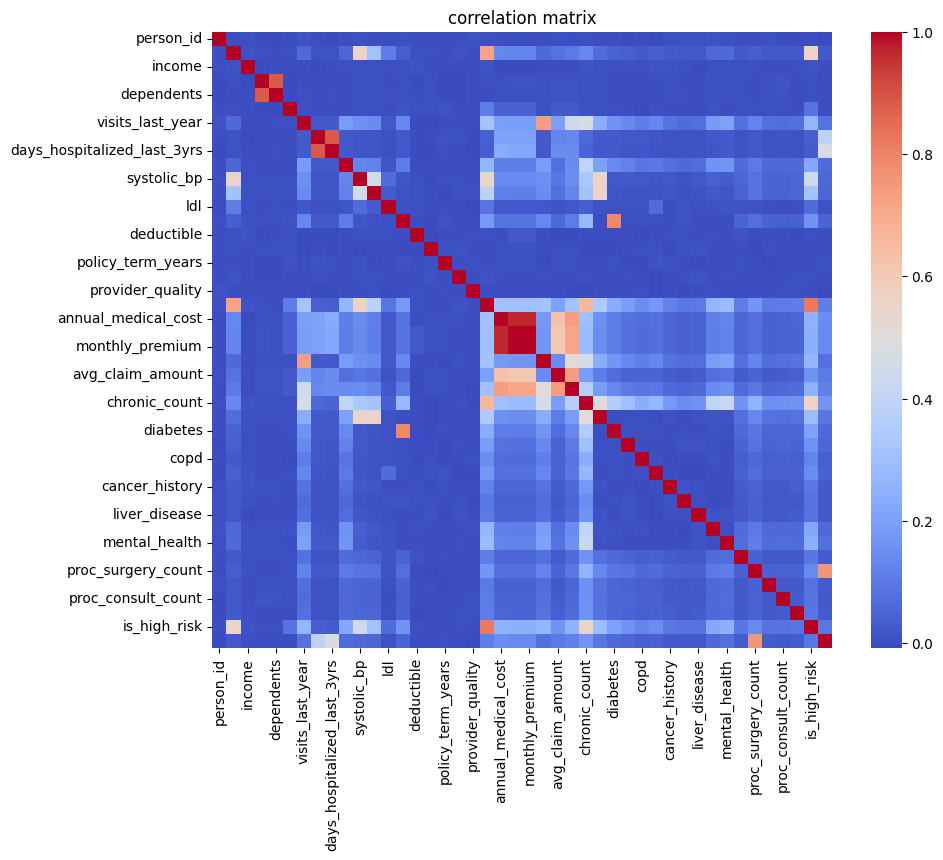

In [38]:
#correlation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

print("correlation matrix")
print(correlation_matrix['annual_premium'].sort_values(ascending=False).head(6))

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('correlation matrix')
plt.show()